In [1]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Dilution Steam Rate

0,25 - 0,40 for C2 feed
0,40 - 1,00 for petroleum cuts

Its not posible to go lower than 0,2 due to  tecnical and economic reasons like streng of material and furnaces cost.
Lower steam means more heat requirement in the furnaces, bigger burners and costly material to achieve the desired T.

In [2]:
# DSR for naphtha
DSR = np.arange(0.4,1.1,0.1)
DSR


array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Coil outlet pressure (Ptotal)
It must be as low as possible depending on the process pressure drop
COP in the range of 2-3 bar abs at furnace outlet, it also must be higher than the succion pressure of the Cracked Gas Compressor.

In [3]:
Ptotal = np.arange(2,3.1,0.1)
Ptotal

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ])

In [4]:
# Generar todas las combinaciones posibles
combinaciones = list(itertools.product(DSR, Ptotal))

# Convertir las combinaciones en un DataFrame de pandas
df = pd.DataFrame(combinaciones, columns=['DSR_[m/m]', 'Ptotal_[bar]'])
df

,DSR_[m/m],Ptotal_[bar]
0,0.4,2.0
1,0.4,2.1
2,0.4,2.2
3,0.4,2.3
4,0.4,2.4
...,...,...
72,1.0,2.6
73,1.0,2.7
74,1.0,2.8
75,1.0,2.9


In [5]:
# M(naphtha)
# Naphtha as C7
Mhydrocarbon = 100 # kg/kmol or g/mol
#df ['Mnaphtha_[kg/kmol]'] = Mhydrocarbon

# M(diluent)
# Diluent as Water vapor
Mdiluent = 18 # kg/kmol or g/mol
#df ['Mdiluent_[kg/kmol]'] = Mdiluent

In [6]:
df ['Pnaphtha_[bar]'] = df['Ptotal_[bar]']/(1+df['DSR_[m/m]']*Mhydrocarbon/Mdiluent)
df

,DSR_[m/m],Ptotal_[bar],Pnaphtha_[bar]
0,0.4,2.0,0.620690
1,0.4,2.1,0.651724
2,0.4,2.2,0.682759
3,0.4,2.3,0.713793
4,0.4,2.4,0.744828
...,...,...,...
72,1.0,2.6,0.396610
73,1.0,2.7,0.411864
74,1.0,2.8,0.427119
75,1.0,2.9,0.442373


<Axes: xlabel='DSR_[m/m]', ylabel='Pnaphtha_[bar]'>

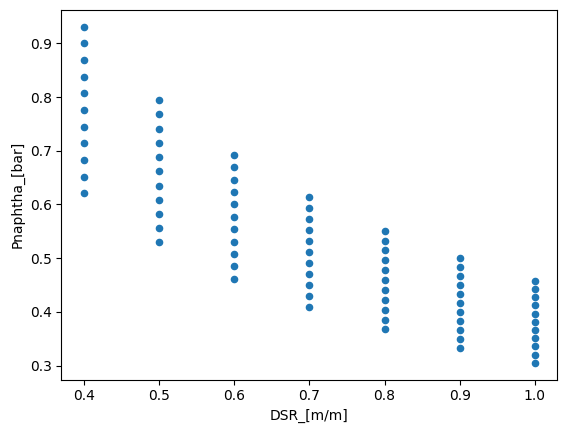

In [7]:
#Plot
df.plot(x='DSR_[m/m]',y='Pnaphtha_[bar]',kind='scatter')

<Axes: xlabel='Ptotal_[bar]', ylabel='Pnaphtha_[bar]'>

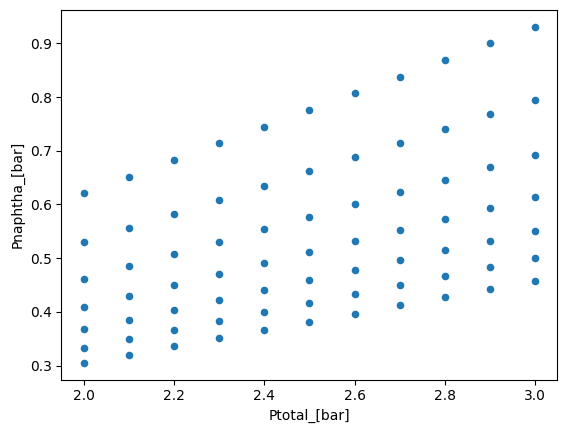

In [8]:
#Plot
df.plot(x='Ptotal_[bar]',y='Pnaphtha_[bar]',kind='scatter')


<Axes: xlabel='Ptotal_[bar]', ylabel='Pnaphtha_[bar]'>

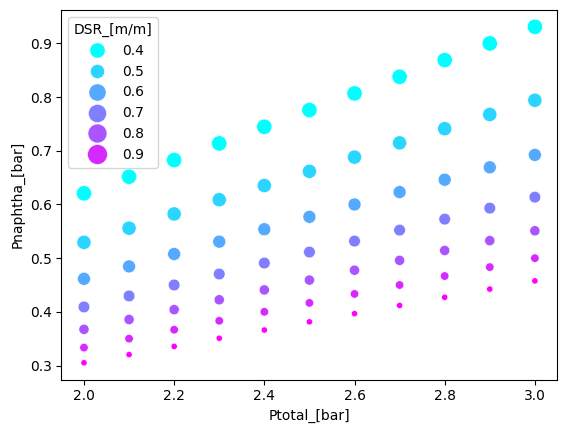

In [9]:
# Gráfico de dispersión con seaborn
sns.scatterplot(
    x='Ptotal_[bar]', y='Pnaphtha_[bar]', hue='DSR_[m/m]', size='DSR_[m/m]',
    sizes=(120, 20), palette='cool', data=df
)

<Axes: xlabel='DSR_[m/m]', ylabel='Pnaphtha_[bar]'>

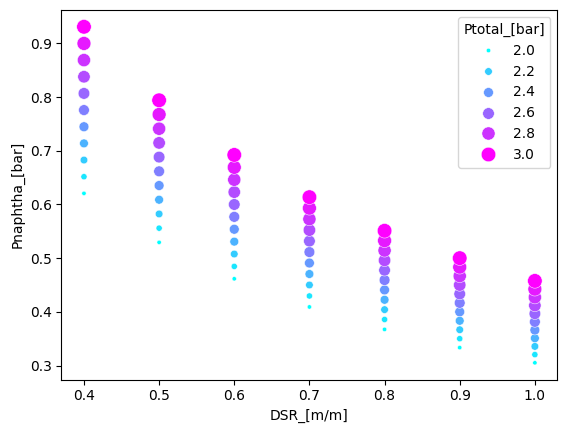

In [10]:
import seaborn as sns

# Gráfico de dispersión con seaborn
sns.scatterplot(
    x='DSR_[m/m]', y='Pnaphtha_[bar]', hue='Ptotal_[bar]', size='Ptotal_[bar]',
    sizes=(10, 110), palette='cool', data=df
)

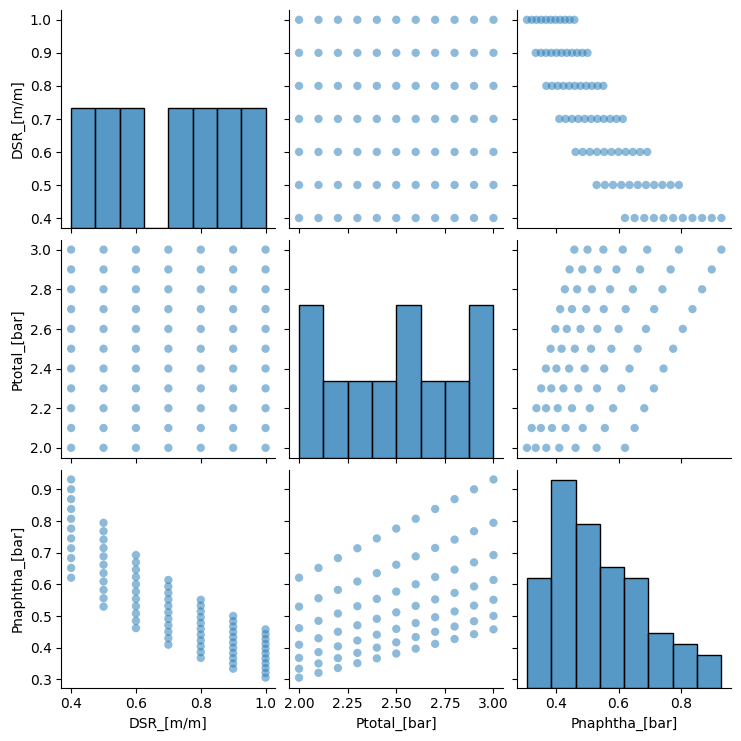

In [11]:
import seaborn as sns
sns.pairplot(df, plot_kws=dict(alpha=.5, edgecolor='none'))

Conclutions

As a matter of fact, HCs Partial Pressure < Patm. 
“It is like if the cracking reaction would have been conducted under vacuum” In contrast of a SMR, steam does not take part of the reaction (Inert).

With the steam in the main stream, it is needed to keep the same flowrate to avoid increase the pressure drop. As a result, a Dilution Steam Ratio DSR must be taken as around 0.6 H20/HC m/m, increasing this value more condensetion capacity will be required. 

DSR From time to time needs to be ajusted. In addition, steam is a low pressure diluent to avoid the formation of coke (bencene and butadiene joint).